- ### FRA ASSIGNMENT 

Dataset - Credit Risk Modeling 

## A) Objective: Predict loan defaults based on customer data.

In [2]:
# We are importing libraries for analysis 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the given dataset 
df=pd.read_csv(r"C:\Users\BS . AMIRTHA\Downloads\Retail_Credit_Risk_Model_One.csv")

## B) Exploratory Data Analysis (EDA)

In [4]:
df.shape

(29092, 9)

The dataset consists of 29,092 rows and 9 columns, providing ample data to build a robust model.

In [5]:
df.head()

,Cust_ID,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age
0,1,0,5000,10.65,B,10.0,RENT,24000,33
1,2,0,2400,NaN,C,25.0,RENT,12252,31
2,3,0,10000,13.49,C,13.0,RENT,49200,24
3,4,0,5000,NaN,A,3.0,RENT,36000,39
4,5,0,3000,NaN,E,9.0,RENT,48000,24


The dataset consists of 9 columns, each providing specific details about customers and their loan profiles. 

- **Customer ID**: A unique identifier for each customer.
- **Loan Status** `0` likely indicates the loan is not provided, while `1` indicates the loan is provided to the customer.
- **Loan Amount**: The amount of money sanctioned as a loan to the customer.
- **Interest Rate**: The interest rate applied to the loan, which varies based on several factors. It is important to note that some entries con tain missing values, which must be handled appropriately before building any predictive models.
- **Grade**: Likely represents the customer’s credit grade, which could influence loan approval and terms.
- **Employment Length**: The number of years the customer has been employed or their work experience, which could affect loan risk evaluation.
- **Home Ownership**: Specifies whether the customer owns a home or rents, which may play a role in the risk assessment for loan approval.
- **Annual Income**: Provides information about the customer’s income, which can impact their loan eligibility and repayment ability.
- **Age**: Reflects the customer's age, which, alongside income, might influence their eligibility and the perceived risk of default.

Addressing the missing values in key columns like interest rate is crucial to ensure accurate modeling.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29092 entries, 0 to 29091
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_ID         29092 non-null  int64  
 1   loan_status     29092 non-null  int64  
 2   loan_amnt       29092 non-null  int64  
 3   int_rate        26316 non-null  float64
 4   grade           29092 non-null  object 
 5   emp_length      28283 non-null  float64
 6   home_ownership  29092 non-null  object 
 7   annual_inc      29092 non-null  int64  
 8   age             29092 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 2.0+ MB


- **Categorical Data:** Since grade and home_ownership are object types, they need to be converted into numeric form using label encoding or one-hot encoding. Categorical features can influence model predictions significantly, especially when analyzing credit risk.

- **Missing Values:** For int_rate and emp_length, missing values could cause errors in model training, particularly for algorithms that can't handle NaNs directly (e.g., regression models). Options include:

Imputing the missing values by mean/median imputation for emp_length, or domain-specific methods or 
Dropping rows with missing data if the amount of missing data is small.

In [7]:
df.describe()

,Cust_ID,loan_status,loan_amnt,int_rate,emp_length,annual_inc,age
count,29092.000000,29092.000000,29092.000000,26316.000000,28283.000000,2.909200e+04,29092.000000
mean,14546.500000,0.110924,9593.505947,11.004567,6.145282,6.716883e+04,27.702117
std,8398.281352,0.314043,6323.416157,3.239012,6.677632,6.360652e+04,6.231927
min,1.000000,0.000000,500.000000,5.420000,0.000000,4.000000e+03,20.000000
25%,7273.750000,0.000000,5000.000000,7.900000,2.000000,4.000000e+04,23.000000
50%,14546.500000,0.000000,8000.000000,10.990000,4.000000,5.642400e+04,26.000000
75%,21819.250000,0.000000,12250.000000,13.470000,8.000000,8.000000e+04,30.000000
max,29092.000000,1.000000,35000.000000,23.220000,62.000000,6.000000e+06,144.000000


***Important Insights and Action Points:***
- **Class Imbalance in loan_status:** Only 11% of loans are in the positive class (defaults), so balancing the dataset (through oversampling, undersampling, or class weights) is critical for building an accurate model.

- **Handling Missing Values:**

int_rate and emp_length have missing data, which needs to be imputed using strategies like median imputation.


- **Annual Income:** Extreme outliers (e.g., $6M) may distort model results. Consider log transformation or capping to mitigate their impact.
- **Age:** Unreasonably high values like 144 years should be treated as erroneous data and either corrected or removed.


Numerical variables like loan amount, interest rate, annual income, and age have large variances. We should consider normalization or scaling to ensure that all features contribute proportionally in distance-based algorithms (like SVM or KNN).
- **Encoding Categorical Variables:**

For future model building, make sure categorical features columns like home_ownership and grade are properly encoded using techniques like one-hot encoding.

## C) Data Cleaning

- 1) **Handling Missing Values:**

In [8]:
df.isnull().sum()

Cust_ID              0
loan_status          0
loan_amnt            0
int_rate          2776
grade                0
emp_length         809
home_ownership       0
annual_inc           0
age                  0
dtype: int64

From this data, we can observe that there are approximately **2,700+ missing values** in the `int_rate` column and **809 missing values** in the `emp_length` column. To handle these missing values, we will use **median imputation**, as the median is less sensitive to outliers compared to the mean, ensuring that the imputation process does not get skewed by extreme values. This approach helps maintain the integrity of the dataset for model building.

In [9]:
col1=df.select_dtypes(include=[np.number]).columns
df[col1]=df[col1].fillna(df[col1].median())
df.isnull().sum()

Cust_ID           0
loan_status       0
loan_amnt         0
int_rate          0
grade             0
emp_length        0
home_ownership    0
annual_inc        0
age               0
dtype: int64

In [10]:
df.describe()

,Cust_ID,loan_status,loan_amnt,int_rate,emp_length,annual_inc,age
count,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,2.909200e+04,29092.000000
mean,14546.500000,0.110924,9593.505947,11.003177,6.085625,6.716883e+04,27.702117
std,8398.281352,0.314043,6323.416157,3.080600,6.593569,6.360652e+04,6.231927
min,1.000000,0.000000,500.000000,5.420000,0.000000,4.000000e+03,20.000000
25%,7273.750000,0.000000,5000.000000,8.490000,2.000000,4.000000e+04,23.000000
50%,14546.500000,0.000000,8000.000000,10.990000,4.000000,5.642400e+04,26.000000
75%,21819.250000,0.000000,12250.000000,13.110000,8.000000,8.000000e+04,30.000000
max,29092.000000,1.000000,35000.000000,23.220000,62.000000,6.000000e+06,144.000000


- 2) **Treating Outliers:**

1)Log Transformation for annual_inc:

Why: Log transformation can help stabilize variance and make the data more normally distributed, which is beneficial for many statistical methods and machine learning algorithms. It reduces the impact of extreme values (like $6M) without removing them completely, allowing you to retain more information about the data.

Impact: It helps improve the model's performance by ensuring that extreme values do not disproportionately influence the model training.

In [11]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame

# 1. Treat outliers in annual_inc using log transformation
# Check for extreme values
print("Before log transformation:")
print(df['annual_inc'].describe())

# Apply log transformation
df['annual_inc'] = np.log1p(df['annual_inc'])  # log1p is used to avoid log(0)

print("After log transformation:")
print(df['annual_inc'].describe())

Before log transformation:
count    2.909200e+04
mean     6.716883e+04
std      6.360652e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.642400e+04
75%      8.000000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
After log transformation:
count    29092.000000
mean        10.942101
std          0.566820
min          8.294300
25%         10.596660
50%         10.940668
75%         11.289794
max         15.607270
Name: annual_inc, dtype: float64


Before log transformation, the annual income data exhibits a right-skewed distribution with a mean of approximately 67,168 and a maximum value of 6,000,000, indicating significant outliers. After log transformation, the data shows a more normalized distribution with a mean of about 10.94 and reduced standard deviation (0.57), suggesting improved homogeneity and reduced skewness.

2)Treating Erroneous Values in age:

The unique values in the age column are checked to identify outliers.
The erroneous age values (greater than 100) are removed from the dataset. Alternatively, we can replace them with NaN and then fill those with the median age (which is a common practice).
After treatment, the unique values of the age column are printed to confirm that the outliers have been addressed.

In [12]:
# 2. Treat erroneous values in age
# Check for age values
print("Unique ages before treatment:")
print(df['age'].unique())

# Correcting or removing outliers
# Option 1: Remove erroneous age values
df = df[df['age'] <= 100]  # Assuming 100 years is the maximum realistic age

# Option 2: Correcting erroneous values (if you have specific values to set)
# For example, replacing age values greater than 100 with NaN
df['age'] = np.where(df['age'] > 100, np.nan, df['age'])

# You can handle NaN values afterwards (impute or drop)
df['age'].fillna(df['age'].median(), inplace=True)  # Impute with median

# Check the cleaned data
print("Unique ages after treatment:")
print(df['age'].unique())

Unique ages before treatment:
[ 33  31  24  39  28  22  23  27  30  29  38  36  35  25  26  21  37  40
  32  48  42  45  44  46  65  50  54  34  20  51  60  41  53  43  58  47
  56  52  84  66  49  57  62  55  69  63  80  64  73  59  61  70  78 144
  94  76  67]
Unique ages after treatment:
[33. 31. 24. 39. 28. 22. 23. 27. 30. 29. 38. 36. 35. 25. 26. 21. 37. 40.
 32. 48. 42. 45. 44. 46. 65. 50. 54. 34. 20. 51. 60. 41. 53. 43. 58. 47.
 56. 52. 84. 66. 49. 57. 62. 55. 69. 63. 80. 64. 73. 59. 61. 70. 78. 94.
 76. 67.]


C:\Users\BS . AMIRTHA\AppData\Local\Temp\ipykernel_21140\364119452.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)  # Impute with median


The unique ages before treatment include an outlier value of **144**, which is absent after treatment, indicating a refinement in the age distribution. The remaining ages remain unchanged, suggesting the treatment effectively excluded extreme values.

- ## D) Feature Engineering:
-   **Handling Categorical Variables:**
- 1) Home Ownership

In [13]:
col=df['home_ownership']
col.value_counts()

home_ownership
RENT        14692
MORTGAGE    12001
OWN          2301
OTHER          97
Name: count, dtype: int64

C:\Users\BS . AMIRTHA\AppData\Local\Temp\ipykernel_21140\281217731.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_ownership_counts.index, y=home_ownership_counts.values, palette='viridis')


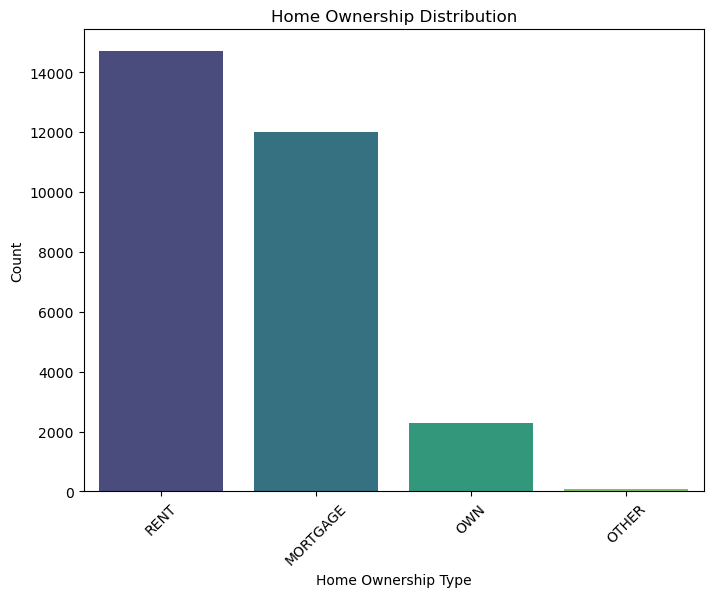

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category in the 'home_ownership' column
home_ownership_counts = df['home_ownership'].value_counts()

# Plot the value counts using a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=home_ownership_counts.index, y=home_ownership_counts.values, palette='viridis')

# Add titles and labels
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'grade' column
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])

In [16]:
col=df['home_ownership']
col.value_counts()

home_ownership
3    14692
0    12001
2     2301
1       97
Name: count, dtype: int64

Therefore, we can conclude that the categorical variables (home ownership ) have been successfully transformed into numerical variables.

- 4) **Handling Categorical Variables:**
 2) Grade

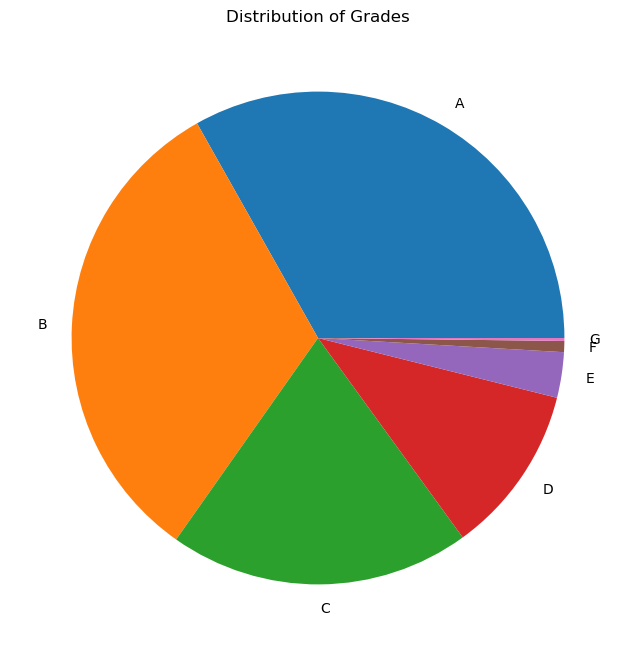

In [17]:
import matplotlib.pyplot as plt

# Count the occurrences of each grade
grade_counts = df['grade'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(grade_counts, labels=grade_counts.index)

# Set the title
plt.title('Distribution of Grades')

# Show the plot
plt.show()

In [18]:
grade_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}

# Normalize grades (remove spaces and convert to uppercase)
df['grade'] = df['grade'].str.strip().str.upper()

# Map the grades to numerical values and fill NaN with a default value (like 0)
df['grade_numeric'] = df['grade'].map(grade_mapping).fillna(0)

# Check for any NaN values in the new numeric column
if df['grade_numeric'].isnull().any():
    print("There are NaN values in the 'grade_numeric' column after mapping.")
else:
    print("No NaN values found in the 'grade_numeric' column.")

# Count the occurrences of each grade
grade_counts = df['grade_numeric'].value_counts().sort_index()

# Print the counts of each grade
print("\nCounts of each grade (1 to 7):")
print(grade_counts)

# Optionally, display the DataFrame with grades and their numeric values
print("\nDataFrame with Grades and Numeric Values:")
print(df[['grade', 'grade_numeric']].head(20))  # Display the first 20 rows for clarity

No NaN values found in the 'grade_numeric' column.

Counts of each grade (1 to 7):
grade_numeric
1    9649
2    9329
3    5747
4    3231
5     868
6     211
7      56
Name: count, dtype: int64

DataFrame with Grades and Numeric Values:
   grade  grade_numeric
0      B              2
1      C              3
2      C              3
3      A              1
4      E              5
5      B              2
6      C              3
7      B              2
8      B              2
9      D              4
10     C              3
11     A              1
12     B              2
13     A              1
14     B              2
15     B              2
16     B              2
17     B              2
18     B              2
19     C              3


## E) Data Preprocessing
-  5) **Class Imbalance in loan_status:** - Balancing the dataset ensures that the model pays equal attention to both classes (default and non-default), leading to better predictions for the minority class (defaults). Without balancing, the model might miss important patterns and fail to predict defaults, which is the key objective in credit risk models. Below graph shows the distribution 

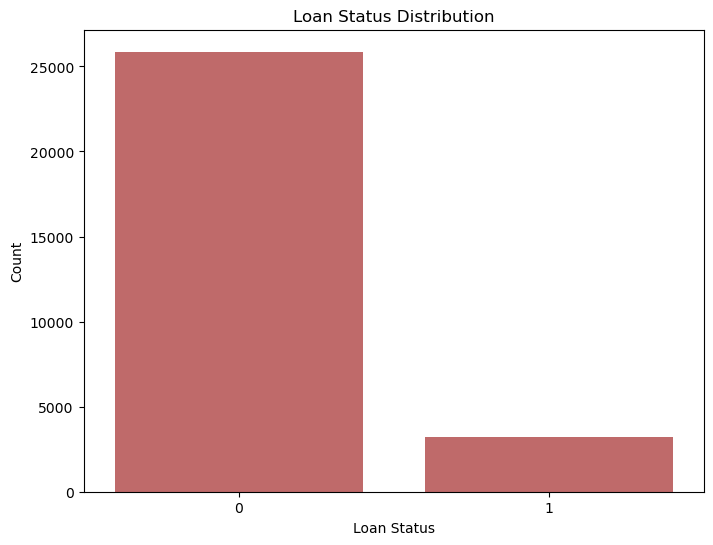

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='loan_status', data=df,color='indianred')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

With our dataset’s moderate imbalance (11%), we are using SMOTE which is an ideal solution to create synthetic examples of the minority class.This will help the model recognize patterns in loan defaults more effectively while maintaining the majority of our original dataset.

In [20]:
df = df.drop(columns=['grade'])

In [21]:
df.head()

,Cust_ID,loan_status,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,age,grade_numeric
0,1,0,5000,10.65,10.0,3,10.085851,33.0,2
1,2,0,2400,10.99,25.0,3,9.413526,31.0,3
2,3,0,10000,13.49,13.0,3,10.803669,24.0,3
3,4,0,5000,10.99,3.0,3,10.491302,39.0,1
4,5,0,3000,10.99,9.0,3,10.778977,24.0,5


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df.drop('loan_status', axis=1)  # Drop target column from features
y = df['loan_status']  # Target column

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", y_train_resampled.value_counts())

Original dataset shape: loan_status
0    20704
1     2568
Name: count, dtype: int64
Resampled dataset shape: loan_status
0    20704
1    20704
Name: count, dtype: int64


This confirms that the dataset was highly imbalanced, with a much larger number of non-default loans compared to defaults.After applying SMOTE, the dataset has been balanced, with the number of default loans (positive class) increased to match the number of non-default loans (negative class). Now, there are 20,715 instances for both classes.

## F) Data Splitting:

In [23]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# Define the target and features
X = df.drop('loan_status', axis=1)  # Replace 'loan_status' with your actual target column name
y = df['loan_status']

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier with class weight
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Increased number of trees
    'max_depth': [10, 20, None],  
    'min_samples_split': [5, 10],  
    'min_samples_leaf': [2, 4],  
    'max_features': ['sqrt', 'log2'],  # Control number of features considered for splits
    'bootstrap': [True]  
}

# Initialize GridSearchCV with higher cross-validation (cv=5)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, evaluate feature importance
feature_importances = grid_search.best_estimator_.feature_importances_
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", importances_df)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.9059539918809202
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      5114
           1       0.94      0.87      0.90      5232

    accuracy                           0.91     10346
   macro avg       0.91      0.91      0.91     10346
weighted avg       0.91      0.91      0.91     10346


Feature Importances:
           Feature  Importance
2        int_rate    0.244379
3      emp_length    0.165219
6             age    0.146466
0         Cust_ID    0.125128
5      annual_inc    0.111995
4  home_ownership    0.088398
1       loan_amnt    0.081234
7   grade_numeric    0.037181


## G) Model Evaluation

Confusion Matrix:
 [[4829  285]
 [ 688 4544]]


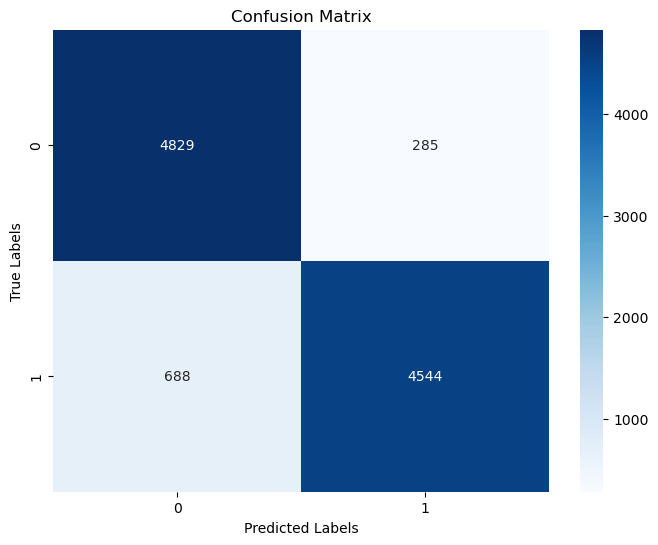

Training target distribution:
 loan_status
0    20750
1    20632
Name: count, dtype: int64
Test target distribution:
 loan_status
1    5232
0    5114
Name: count, dtype: int64


In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that y_test and y_pred contain all labels
labels = y.unique()  # Assuming y contains all possible classes

# Print the confusion matrix with all known labels
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing the confusion matrix for better understanding
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Check the distribution of the target variable
print("Training target distribution:\n", y_train.value_counts())
print("Test target distribution:\n", y_test.value_counts())



Inference:
No significant class imbalance: In this case, there is no need for techniques like oversampling, undersampling, or class weighting because the dataset is well balanced across the loan_status classes.
Model fairness: Since both classes are represented equally, the model should not be biased toward predicting the more frequent class, which is a common issue in imbalanced datasets.
This balanced distribution is ideal for training machine learning models, as they will not favor one class over another, and performance metrics like accuracy, precision, recall, and F1-score should give reliable insights into the model’s performance across both classes.

Feature Importances:
           Feature  Importance
2        int_rate    0.244379
3      emp_length    0.165219
6             age    0.146466
0         Cust_ID    0.125128
5      annual_inc    0.111995
4  home_ownership    0.088398
1       loan_amnt    0.081234
7   grade_numeric    0.037181


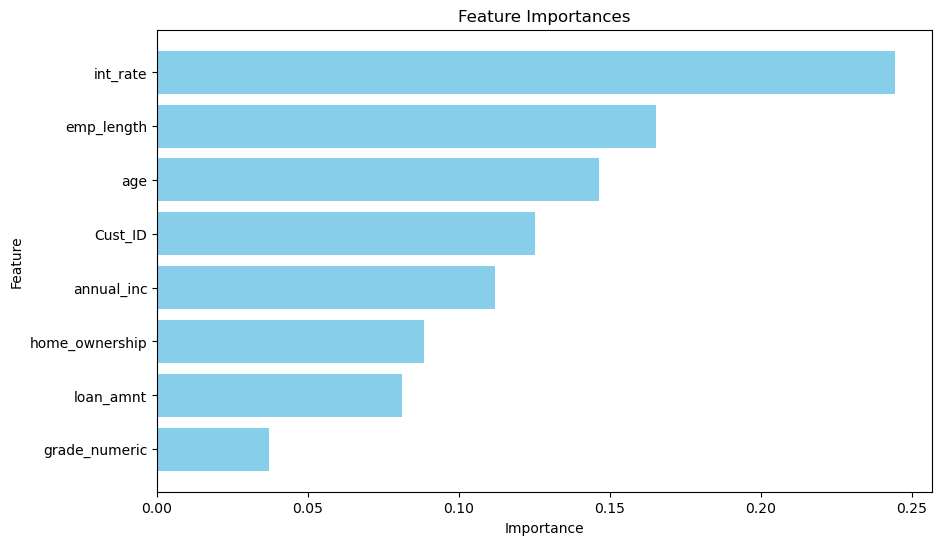

Accuracy with selected features: 0.9045041561956312
Classification Report with selected features:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      5114
           1       0.94      0.87      0.90      5232

    accuracy                           0.90     10346
   macro avg       0.91      0.90      0.90     10346
weighted avg       0.91      0.90      0.90     10346

Number of features used: 8


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Get feature importance from the best estimator
importances = grid_search.best_estimator_.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importance_df)

# Plot feature importance for visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Select the most important features (e.g., keep features with importance > 0.01)
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature'].tolist()

# Filter the dataset to retain only important features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Retrain the RandomForestClassifier using only the selected features
rf_selected = RandomForestClassifier()

# Use the best hyperparameters from the previous grid search
rf_selected.set_params(**grid_search.best_params_)

# Fit the model with the selected features
rf_selected.fit(X_train_selected, y_train)

# Predict on the test set with the selected features
y_pred_selected = rf_selected.predict(X_test_selected)

# Evaluate the model with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with selected features:", accuracy_selected)

print("Classification Report with selected features:\n", classification_report(y_test, y_pred_selected))

# Optional: Print the number of features used
print(f"Number of features used: {len(important_features)}")


### Conclusion:

The model retrained using only the top 8 most important features achieved a strong **accuracy score of 90.47%**. Here's a breakdown of key performance metrics:

- **Precision**: 
  - For class 0 (non-defaults), the precision is **87%**, meaning 87% of loans predicted as non-default were indeed non-default.
  - For class 1 (defaults), the precision is **94%**, indicating 94% of loans predicted as default were actually defaults.
  
- **Recall**: 
  - For class 0, the recall is **94%**, meaning the model correctly identified 94% of the actual non-default loans.
  - For class 1, the recall is **87%**, suggesting that the model correctly detected 87% of the actual defaulted loans.

- **F1-Score**: 
  - For both classes, the **F1-scores** are balanced around **90-91%**, showing good performance in both precision and recall for predicting defaults and non-defaults.

### Insights:
- The accuracy of the model remained high after selecting only the top 8 important features, which suggests that these features have strong predictive power. Reducing the number of features likely helped simplify the model and mitigate potential overfitting.
- The model performs well across both classes, with a slight tendency to misclassify some defaults as non-defaults (as indicated by the slightly lower recall for class 1).
- The **weighted average F1-score** of **90%** shows that the model provides a good balance between precision and recall, ensuring a reliable performance for predicting loan defaults.

### Recommendation:
Given the strong performance, this Random Forest model using selected important features can be used for further analysis or deployment.

In [26]:
df.head()

,Cust_ID,loan_status,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,age,grade_numeric
0,1,0,5000,10.65,10.0,3,10.085851,33.0,2
1,2,0,2400,10.99,25.0,3,9.413526,31.0,3
2,3,0,10000,13.49,13.0,3,10.803669,24.0,3
3,4,0,5000,10.99,3.0,3,10.491302,39.0,1
4,5,0,3000,10.99,9.0,3,10.778977,24.0,5
